# 1. Herramientas para procesamiento de texto 
<p><img style="float: right ; margin: 5px 20px 5px 10px; width: 45%" src="https://es.wikipedia.org/wiki/El_Gaucho_Mart%C3%ADn_Fierro#/media/Archivo:Gaucho.jpg"> </p>
<p>Cúal es la palabra más frecuente en el lbro "El Martin Fierro", y cuántas veces sale en dicho libro ?</p>
<p>En éste notebook, vamos a scrappear el libro <em>El Martin Fierro</em> del sitio <a href="https://www.gutenberg.org/">Project Gutenberg</a> (que es  una buena fuente de libros) usando el package de Python <code>requests</code>. Despúés vamos a estar consultadon la data con <code>BeautifulSoup</code>.Finalmente, vamos a estar analizando las distribuciones de las palabras usando Natural Language ToolKit (<code>nltk</code>). </p>
<p>El<em>Data Science pipeline</em> que vamos a estar construyendo en éste notebook puede aplicarse a cualquier texto que queramos usar. </p>
<p>Primero, vamos a cargar las tres libreías que vamos a usar</p>

In [6]:
# Importando requests, BeautifulSoup y nltk

import requests
from bs4 import BeautifulSoup
import nltk

## 2. Buscar El Martin Fierro
<p>Para analizar El Martin Fierro, debemos obtener el texto de <em>algún lado</em>. Por suerte, el libro lo pueden obtener desde acá: https://www.gutenberg.org/cache/epub/14765/pg14765.txt.</p>
<p>Ahora vamos a usar <code>request</code> package para hacer un <code>GET</code> request al sitio, que significa que vamos a estar <em>obteniendo</em> data de éste. Ésto es lo podrás hace manualmente, perto lo podemos hacer automáticamente con Python. </p>

In [7]:
# Obteniendo el txt del libro 
r = requests.get('https://www.gutenberg.org/cache/epub/14765/pg14765.txt')

# Seteando el text encoding por si lo obtengo también por HTML
r.encoding = 'utf-8'

# Extrayendo el HTML del request
html = r.text

# Obteniendo los primeros 2000 caracteres en HMTL
print(html[0:50])

﻿The Project Gutenberg EBook of El Gaucho Martín F


## 3. Obteniendo el texto desde el HTML
<p>Éste HTML no es lo que queremos. De cualquier manera, lo que <em>contiene</em> es lo que queremos: El texto de  <em>El Martin Fierro</em>. Lo que queremos hacer es extraer el texto del libro. Para ésto vamos a estar usando <code>BeautifulSoup</code>.</p>
<p>Primero, hablemos sobre BeautifulSoup: Beautiful Soup? En web Development, el término "tag soup" refiere a una estructura o sintaxis incorrecta del código HTML escrita para una web. Lo que Beautiful Soup hace es estructurar de una mejor manera de la cual se pueda obtener mejores tipos de tag para finalmente sacar el texto. Despues de aplicar dicho package, vamos a usar <code>.get_text()</code> como método de extracción de texto.</p>

In [8]:
# Creando un objeto BeautifulSoup desde el HTML
soup = BeautifulSoup(html, 'html.parser')

# Obtenniendo el texto
text = soup.get_text()

## 4. Extrayendo las palabras
<p>Ahora ya tenemos el texto del libro! Vamos a ir borrando las cosas que no nos sirvan, lo que llamamos las Stopwords</p>
<p>Para obtener la cantidad de palabras que existen en el texto, vamos a usar<code>nltk</code> – el Natural Language Toolkit. Empecemos tokenizando el texto, ésto es, remover cualquier cosa que no sea una palabra (espacios, puntuación, etc.). Ahora a splittear todo!.</p>

In [10]:
# Creando el tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizando el texto
tokens = tokenizer.tokenize(text)

## 5. Pasar todo a lowercase
<p>Para poder hacer una mejor distribución de palabras: </p>

In [11]:
# Una nueva lista todas en Mayuscula
words = []

# Loopenado a través de los tokens y haciendolas Mayuscula
for word in tokens:
    words.append(word.lower())

# Las primras 5 palabras / tokens 
print(words[:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'el', 'gaucho', 'martín']


## 6. Cargar las stop words
<p>Es común remover que pueden aparecer repetidas veces en un texto y que no nos sirvan, como la palabra 'el', 'la' and 'de' ya que no son de nuestro interés. Ésas palabras las conocemos como <em>stop words</em>. Vamos a cargar las stop words del idima Inglés y Español, ya que el libro tiene parte del libro escrita en ambos idiomas </p>

In [13]:
# Guardando las stop words en una lista
sw = ['a',
'acá',
'ahí',
'ajena',
'al',
'algo',
'algún',
'allá',
'ambos',
'ante',
'antes',
'aquel',
'aquella',
'aquí',
'arriba',
'así',
'atrás',
'aun',
'aunque',
'bajo',
'bastante',
'bien',
'cabe',
'cada',
'casi',
'cierto',
'como',
'con',
'conmigo',
'conseguimos',
'conseguir',
'consigo',
'consigue',
'consiguen',
'consigues',
'contigo',
'contra',
'cual',
'cuales',
'cualquier',
'cuan',
'cuando',
'cuanto',
'de',
'dejar',
'del',
'demás',
'demasiada'
'dentro',
'desde',
'donde',
'dos',
'el',
'él',
'ella',
'empleáis',
'emplean',
'emplear',
'empleas',
'empleo',
'en',
'encima',
'entonces',
'entre',
'era',
'eramos',
'eran',
'eres',
'es',
'esa',
'esta',
'estaba',
'estado',
'estáis',
'estamos',
'están',
'estar',
'este',
'estoy',
'etc',
'fin',
'fue',
'fueron',
'fui',
'fuimos',
'gueno',
'ha',
'hace',
'hacéis',
'hacemos',
'hacen',
'hacer',
'hacia',
'hago',
'hasta',
'incluso',
'intenta',
'intentáis',
'intentamos',
'intentan',
'intentar',
'intento',
'ir',
'jamás',
'junto',
'la',
'largo',
'los',
'lo', 
'la',
'las',
'le',
'pa',
'o',      
'más',
'me',
'menos',
'mi',
'mía',
'mientras',
'mío',
'misma',
'modo',
'mucha',
'muchísima',
'mucho',
'muy',
'nada',
'ni',
'ningún',
'no',
'nos',
'nosotras',
'nuestra',
'nunca',
'os',
'otra',
'para',
'parecer',
'pero',
'poca',
'podéis',
'podemos',
'poder',
'podría',
'podríais',
'podríamos',
'podrían',
'por',
'por',
'porque',
'primero',
'puede',
'puedo',
'pues',
'que',
'qué',
'querer',
'quién',
'quienesquiera',
'quienquiera',
'quizá',
'sabe',
'sabéis',
'sabemos',
'saber',
'se',
'según',
'ser',
'si',
'sí',
'siempre',
'siendo',
'sin',
'sino',
'so',
'sobre',
'sois',
'solamente',
'solo',
'sólo',
'somos',
'soy',
'sr',
'sra',
'sres',
'sta',
'su', 'sus',
'suya','suyo','suyos' 
'tal',
'también',
'tampoco',
'tan',
'tanta',
'te',
'tenéis',
'tenemos',
'tener',
'terms',
'tengo',
'ti',
'tiempo',
'tiene',
'electronic',
'fundation',      
'tienen',
'toda','todo', 'todos',
'tomar',
'trabaja', 'trabajo',
'trabajáis',
'trabajamos',
'trabajan',
'trabajar',
'trabajas',
'tras',
'tú',
'tu',
'tus',
'tuya','tuyo','tuyos'
'último',
'ultimo',
'un','una', 'uno', 'unos',
'usa', 'usas',
'usáis',
'usamos',
'usan',
'usar',
'uso',
'1',
'work',
'works',
'usted','ustedes',
'va','van',
'vais',
'valor',
'vamos',
'varias', 'varios',
'vaya',
'verdadera',
'voy',
'y',
'ya',
'yo',
'a', 'about', 'above', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also','although','always','am','among', 'amongst', 'amoungst', 'amount',  'an', 'and', 'another', 'any','anyhow','anyone','anything','anyway', 'anywhere', 'are', 'around', 'as',  'at', 'back','be','became', 'because','become','becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom','but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven','else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'foundation', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'gutenberg', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own','part', 'per', 'perhaps', 'please', 'project', 'tm', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves', 'the']

print(words[:8])


['the', 'project', 'gutenberg', 'ebook', 'of', 'el', 'gaucho', 'martín']


## 7. Removiendo las stop words
<p>Ahora queremos crear una lista con todas las <code>palabras</code> en El Martin Fierro, excepto aquellas que son stop words (ésto es, aquellas palabras listadas en <code>sw</code>).</p>

In [14]:
# Una lista para las No Stop words
words_ns = []

# Agregamos a words_ns todas las palabras que no están en  sw
for word in words:
    if word not in sw:
        words_ns.append(word)


print(words_ns[:10])

['ebook', 'gaucho', 'martín', 'fierro', 'josé', 'hernández', 'ebook', 'use', 'cost', 'restrictions']


## 8. Tenemos la respuestaa
<p>Nuestra pregunta original era:</p>
<blockquote>
  <p>Cúal es la palabra más frecuente en el lbro "El Martin Fierro", y cuántas veces sale en dicho libro?</p>
</blockquote>
<p>Ahora lo vamos a averiguar. Creamos una distribution plot usando <code>nltk</code>. </p>

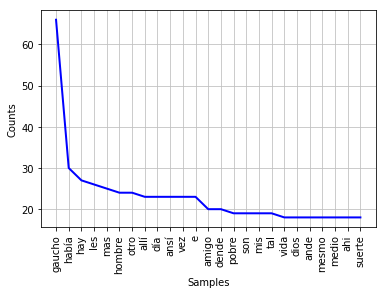

In [15]:
# Este commando va in-line
%matplotlib inline

# Creando la distribucion de las palabras
freqdist = nltk.FreqDist(words_ns)


# Plottieando la distribucion de palabras
freqdist.plot(25, color='blue', linewidth=2, markersize=12)

## 9. La palabra más común
<p>Bien! Ya tenemos la respuesta. </p>
<p>Los skills que hemos usado en ésta notebook son los que usaría cualquier Data Scientist, verificando que la palabra más usada es GAUCHO </p>